#### URIEL ISAAC ALVAREZ CARDENAS 

In [15]:
import pandas as pd

df_train = pd.read_csv("C:/Users/isaac/Documents/Data_extraction/train_labels.csv")
df_train

,pathology,Path
0,MALIGNANT,Mass-Training_P_00001_LEFT_CC/1.3.6.1.4.1.9590...
1,MALIGNANT,Mass-Training_P_00001_LEFT_MLO/1.3.6.1.4.1.959...
2,BENIGN,Mass-Training_P_00004_LEFT_CC/1.3.6.1.4.1.9590...
3,BENIGN,Mass-Training_P_00004_LEFT_MLO/1.3.6.1.4.1.959...
4,BENIGN,Mass-Training_P_00004_RIGHT_MLO/1.3.6.1.4.1.95...
...,...,...
8181,MALIGNANT,Calc-Training_P_02566_RIGHT_MLO_1/1.3.6.1.4.1....
8182,MALIGNANT,Calc-Training_P_02572_LEFT_CC_1/1.3.6.1.4.1.95...
8183,MALIGNANT,Calc-Training_P_02572_LEFT_MLO_1/1.3.6.1.4.1.9...
8184,BENIGN,Calc-Training_P_02584_LEFT_CC_1/1.3.6.1.4.1.95...


In [16]:
df_train["Path"][0]

'Mass-Training_P_00001_LEFT_CC/1.3.6.1.4.1.9590.100.1.2.422112722213189649807611434612228974994/1.3.6.1.4.1.9590.100.1.2.342386194811267636608694132590482924515/000000.dcm'

Hay algunos problemas con los dataset de las etiquetas, esta funcion es para arreglarlos, sera necesario aplicarla para todos los dataset

In [17]:
def replace_path_patterns(df):
    df["Path"] = df["Path"].str.replace(r'\\', '/')
    df["Path"] = df["Path"].str.replace(r'000000.dcm', '1-1.dcm')
    df["Path"] = df["Path"].str.replace(r'000001.dcm', '1-2.dcm')
    df["Path"] = df["Path"].str.rstrip('\n')
    return df

In [18]:
# Apply the function
df_train = replace_path_patterns(df_train)

df_train["Path"][0]

C:\Users\isaac\AppData\Local\Temp\ipykernel_16896\1875701304.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df["Path"] = df["Path"].str.replace(r'\\', '/')
C:\Users\isaac\AppData\Local\Temp\ipykernel_16896\1875701304.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df["Path"] = df["Path"].str.replace(r'000000.dcm', '1-1.dcm')
C:\Users\isaac\AppData\Local\Temp\ipykernel_16896\1875701304.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df["Path"] = df["Path"].str.replace(r'000001.dcm', '1-2.dcm')


'Mass-Training_P_00001_LEFT_CC/1.3.6.1.4.1.9590.100.1.2.422112722213189649807611434612228974994/1.3.6.1.4.1.9590.100.1.2.342386194811267636608694132590482924515/1-1.dcm'

Ahora vamos a entraer algunas caracteristicas de alguna imagen del dataset

In [19]:
import pydicom # pip install pydicom
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

In [20]:
# Pixel matrix of the DICOM image
ds = pydicom.dcmread(df_train["Path"][42])
ds

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 194
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.9590.100.1.2.160915787510485365830503614943211065871
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002, 0013) Implementation Version Name         SH: 'dcm4che-1.4.35'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.9590.100.1.2.160915787510485365830503614943211065871
(0008, 0020) Study Date                          DA: '20160720'
(0008, 0023) Content D

In [21]:
img = ds.pixel_array
img

array([[  287,   177,   683, ..., 61053, 61097, 61075],
       [  353,     0,   441, ..., 60591, 60943, 60921],
       [ 1013,   639,  1387, ..., 60635, 60987, 60987],
       ...,
       [ 1145,   529,   991, ..., 60987, 61053, 60943],
       [  727,     0,    44, ..., 60811, 60855, 60855],
       [  551,   837,   837, ..., 60921, 60899, 60877]], dtype=uint16)

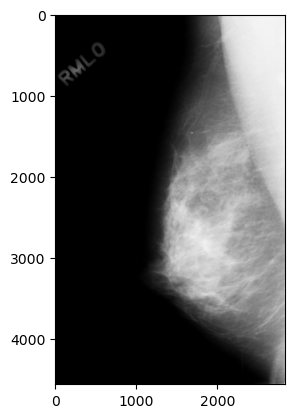

In [22]:
plt.imshow(img, cmap='gray')

In [23]:
# Initialize an empty DataFrame
df = pd.DataFrame()

# Iterate over elements in ds
for elem in ds:
    # Create a new DataFrame with the data from each element
    new_row = pd.DataFrame({
        'tag': [elem.tag],
        'description': [elem.description()],
        'value': [elem.value],
        'VM': [elem.VM],
        'VR': [elem.VR],
        'name': [elem.name]
    })

    # Concatenate the new row DataFrame with the existing DataFrame
    df = pd.concat([df, new_row], ignore_index=True)

df

,tag,description,value,VM,VR,name
0,524293,Specific Character Set,ISO_IR 100,1,CS,Specific Character Set
1,524310,SOP Class UID,1.2.840.10008.5.1.4.1.1.7,1,UI,SOP Class UID
2,524312,SOP Instance UID,1.3.6.1.4.1.9590.100.1.2.160915787510485365830...,1,UI,SOP Instance UID
3,524320,Study Date,20160720,1,DA,Study Date
4,524323,Content Date,20160426,1,DA,Content Date
5,524336,Study Time,181506,1,TM,Study Time
6,524339,Content Time,103637.330000,1,TM,Content Time
7,524368,Accession Number,,0,SH,Accession Number
8,524384,Modality,MG,1,CS,Modality
9,524388,Conversion Type,WSD,1,CS,Conversion Type


In [24]:
# Select the important columns from the DataFrame
important_columns = ['Modality', 'Patient\'s Name', 'Patient ID', 'Patient\'s Sex', 'Study Date',
                     'Series Description', 'Laterality', 'Rows', 'Columns', 'Bits Allocated',
                     'Bits Stored', 'High Bit', 'Pixel Representation', 'Smallest Image Pixel Value',
                     'Largest Image Pixel Value']

# Create a new DataFrame with the important columns
important_data = df[df['name'].isin(important_columns)]

important_data

,tag,description,value,VM,VR,name
3,524320,Study Date,20160720,1,DA,Study Date
8,524384,Modality,MG,1,CS,Modality
11,528446,Series Description,full mammogram images,1,LO,Series Description
12,1048592,Patient's Name,"(M, a, s, s, -, T, r, a, i, n, i, n, g, _, P, ...",1,PN,Patient's Name
13,1048608,Patient ID,Mass-Training_P_00064_RIGHT_MLO,1,LO,Patient ID
15,1048640,Patient's Sex,,0,CS,Patient's Sex
28,2097248,Laterality,R,1,CS,Laterality
31,2621456,Rows,4560,1,US,Rows
32,2621457,Columns,2832,1,US,Columns
33,2621696,Bits Allocated,16,1,US,Bits Allocated
